# Objective: Modeling Wine Quality based on its physicochemical attributes.

In [1]:
import pandas as pd               # package for data analysis and manipulation 
import numpy as np                # package for scientific computing on multidimensional arrays 
import matplotlib                 # package for creating visualizations
from matplotlib import pyplot as plt
import seaborn as sns             # data visualization library based on matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import scipy                      # library for mathematics, science and engineering

In [2]:
df=pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ', '_')
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
new_order = [11, 10] + list(range(10))
df = df[df.columns[new_order]]
df.head(1)

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,5,9.4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56


In [10]:
df.duplicated().sum()

240

In [11]:
#Droping Duplicates

In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\krishna vamsi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.duplicated().sum()

0

In [14]:
df.to_csv('red_wine.csv', index=False)

# EDA

In [15]:
df.head()

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,5,9.4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56
1,5,9.8,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68
2,5,9.8,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65
3,6,9.8,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58
4,5,9.4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56


In [16]:
df.isnull().any()

quality                 False
alcohol                 False
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
dtype: bool

In [17]:
df.describe ()

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,5.623252,10.432315,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705
std,0.823578,1.082065,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667
min,3.000000,8.400000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000
25%,5.000000,9.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000
50%,6.000000,10.200000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000
75%,6.000000,11.100000,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000
max,8.000000,14.900000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000


[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY')]

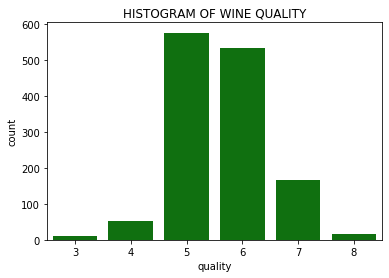

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='quality', data=df, color='green')
ax.set(title='HISTOGRAM OF WINE QUALITY')


In [19]:
category_dic = {3:'bad', 4:'bad', 5:'bad', 6:'bad', 7:'good', 8:'good'}
df['quality2'] = df.quality.map(category_dic)

df.quality2.value_counts()

C:\Users\krishna vamsi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


bad     1175
good     184
Name: quality2, dtype: int64

In [20]:
np.round(df.quality2.value_counts() / len(df) * 100, 1)

bad     86.5
good    13.5
Name: quality2, dtype: float64

[[],
 Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY')]

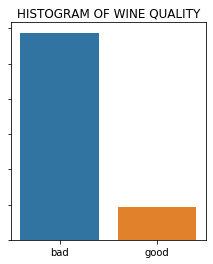

In [21]:
plt.figure(figsize=(3.5, 4))

ax = sns.countplot(x='quality2', data=df)
ax.set(title='HISTOGRAM OF WINE QUALITY', xlabel='', ylabel='', yticklabels=[])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024888DF9F08>,
      dtype=object)

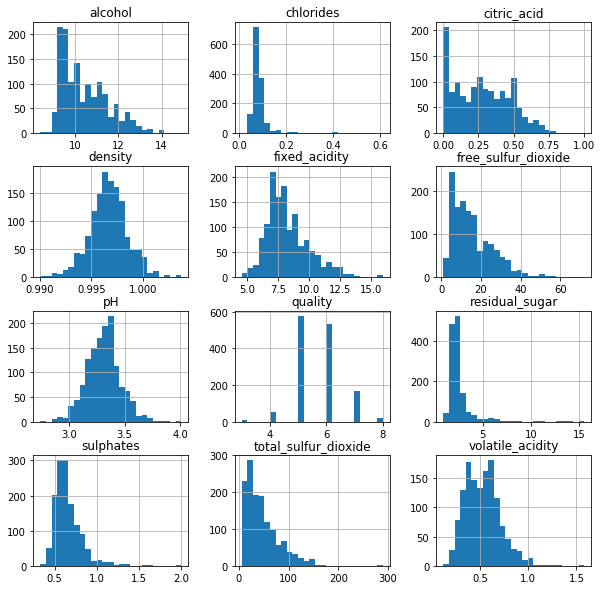

In [22]:
df.hist(bins=25,figsize=(10,10))

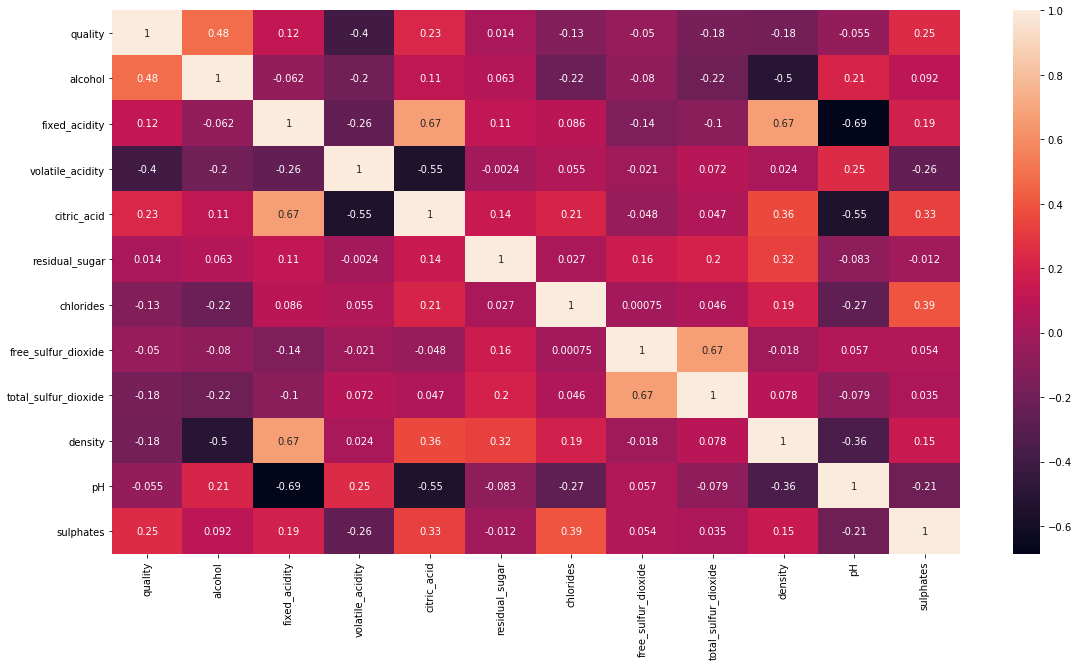

In [23]:
plt.figure(figsize=[19,10])
sns.heatmap(df.corr(),annot=True)

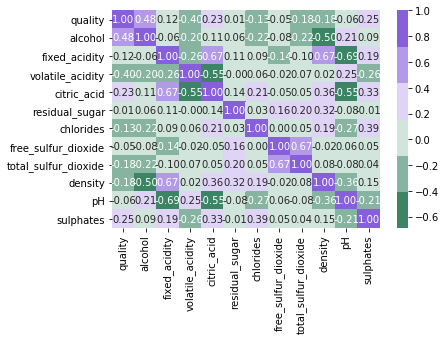

In [24]:
pearson_corr=df.corr(method='pearson')
cmap = sns.diverging_palette(150, 275)
sns.heatmap(pearson_corr,annot=True,fmt=',.2f',cmap=cmap, 
            cbar=True)

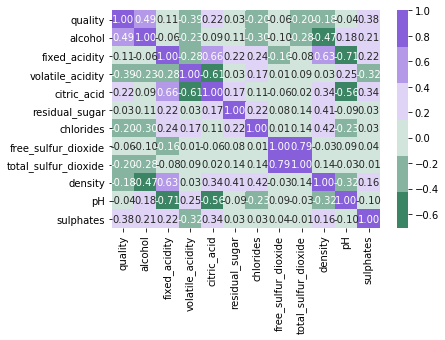

In [25]:
spearman_corr=df.corr(method='spearman')
cmap = sns.diverging_palette(150, 275)
sns.heatmap(spearman_corr,annot=True,fmt=',.2f',cmap=cmap, 
            cbar=True)

# Training and Testing Model

In [26]:
df.drop('quality',axis=1)

,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality2
0,9.4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,bad
1,9.8,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,bad
2,9.8,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,bad
3,9.8,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,bad
4,9.4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,9.5,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,bad
1355,10.5,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,bad
1356,11.2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,bad
1357,10.2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,bad


In [27]:
#Creating a class label for prediction
x = df.iloc[:,1:12]
y = LabelEncoder().fit_transform(df.quality2)
np.unique(y, return_counts=True)
x


,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,9.4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,9.8,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,9.8,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,9.8,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,9.4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...,...
1354,9.5,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82
1355,10.5,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1356,11.2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1357,10.2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [28]:
class_dictionary = {'bad':0, 'good':1}
y = df.quality2.map(class_dictionary)
y.value_counts(sort=False)
y

0       0
1       0
2       0
3       0
4       0
       ..
1354    0
1355    0
1356    0
1357    0
1358    0
Name: quality2, Length: 1359, dtype: int64

In [29]:
feature_names = np.array(x.columns)
print('Number of features =', len(feature_names))
print(feature_names)

Number of features = 11
['alcohol' 'fixed_acidity' 'volatile_acidity' 'citric_acid'
 'residual_sugar' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates']


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1354    0
1355    0
1356    0
1357    0
1358    0
Name: quality2, Length: 1359, dtype: int64

In [31]:
df['quality2']=y


C:\Users\krishna vamsi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scale
norm_fit = norm.fit(x_train)
# transfromation of trainig data
new_xtrain = norm_fit.transform(x_train)
# transformation of testing data
new_xtest = norm_fit.transform(x_test)
print(new_xtrain)

[[0.25       0.33636364 0.32876712 ... 0.44180875 0.32283465 0.11976048]
 [0.75       0.37272727 0.19863014 ... 0.37805782 0.39370079 0.26347305]
 [0.53571429 0.40909091 0.15068493 ... 0.27575982 0.34645669 0.13173653]
 ...
 [0.10714286 0.50909091 0.28767123 ... 1.         0.34645669 0.26347305]
 [0.30357143 0.24545455 0.37671233 ... 0.51890289 0.51968504 0.17964072]
 [0.23214286 0.22727273 0.33561644 ... 0.53743514 0.58267717 0.16167665]]


In [34]:
import numpy as np
new_xtrain = np.array(new_xtrain)
new_xtest = np.array(new_xtest)
y_train = np.array(y_train)
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Random Forest Classifier

In [35]:
#Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [36]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(new_xtrain,y_train)
y_predict = rfc.predict(new_xtest)

In [37]:
#predicting Score of model and displaying error rate of model
rfc_score = rfc.score(new_xtest,y_test)
print('score of model is : ',rfc_score)

mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(rmse)
print(classification_report(y_test,y_predict
                           ))

score of model is :  0.8198529411764706
0.4244373438135827
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       232
           1       0.34      0.25      0.29        40

    accuracy                           0.82       272
   macro avg       0.61      0.58      0.59       272
weighted avg       0.80      0.82      0.81       272



# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(new_xtrain, y_train)
y_pred2 = model2.predict(new_xtest)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       232
           1       0.31      0.38      0.34        40

    accuracy                           0.79       272
   macro avg       0.60      0.62      0.61       272
weighted avg       0.80      0.79      0.79       272



# Ada Boost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(new_xtrain, y_train)
y_pred3 = model3.predict(new_xtest)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       232
           1       0.32      0.25      0.28        40

    accuracy                           0.81       272
   macro avg       0.60      0.58      0.59       272
weighted avg       0.79      0.81      0.80       272



# Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(new_xtrain, y_train)
y_pred4 = model4.predict(new_xtest)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       232
           1       0.31      0.25      0.28        40

    accuracy                           0.81       272
   macro avg       0.59      0.58      0.58       272
weighted avg       0.79      0.81      0.80       272



# XGB Classifier

In [41]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(new_xtrain, y_train)
y_pred5 = model5.predict(new_xtest)
print(classification_report(y_test, y_pred5))

[19:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       232
           1       0.41      0.38      0.39        40

    accuracy                           0.83       272
   macro avg       0.65      0.64      0.64       272
weighted avg       0.82      0.83      0.82       272



C:\Users\krishna vamsi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


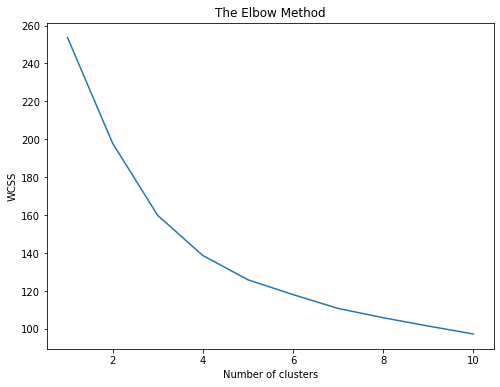

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(new_xtrain)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# build the model with the output from elbow method which is 2
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
ymeans=k_means.fit(new_xtrain)
labels = k_means.labels_
print(labels)
k_means.cluster_centers_

[2 0 0 ... 1 2 1]


array([[0.44499239, 0.48784355, 0.18571798, 0.47453488, 0.09499877,
        0.13925826, 0.14321978, 0.14392277, 0.52596023, 0.36872825,
        0.23513438],
       [0.24667495, 0.31984682, 0.28886296, 0.28871795, 0.11579735,
        0.1355556 , 0.343987  , 0.52170157, 0.52100729, 0.4286868 ,
        0.18580422],
       [0.36666667, 0.23640232, 0.35101282, 0.10544681, 0.07366647,
        0.11364686, 0.1742733 , 0.17290245, 0.42602401, 0.52020439,
        0.16723149]])

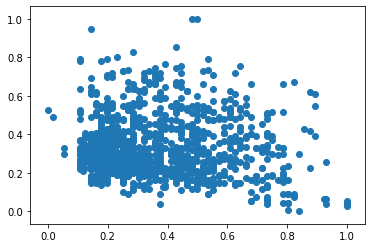

In [50]:
plt.scatter(new_xtrain[:,0],new_xtrain[:,1])

In [54]:
plt.scatter(x[ymeans==0],s=100,color='red',label='1')
plt.scatter(x[ymeans==1],s=100,color='green',label='0')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,:],s=300,color='yellow',label='centroids')
plt.title('clusters of customers')
plt.xlabel('sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

KeyError: False